## End-to-End Toy Project

### Steps
0. Preprocess + EDA + Feature Selection
1. Extract input and output
2. Scale the values
3. Train Test split
4. Train the model
5. Evaluate the model / model selection
6. Deploy the model

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('placement.csv')

In [13]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [14]:
df.shape

(100, 4)

In [15]:
df.info

<bound method DataFrame.info of     Unnamed: 0  cgpa     iq  placement
0            0   6.8  123.0          1
1            1   5.9  106.0          0
2            2   5.3  121.0          0
3            3   7.4  132.0          1
4            4   5.8  142.0          0
..         ...   ...    ...        ...
95          95   4.3  200.0          0
96          96   4.4   42.0          0
97          97   6.7  182.0          1
98          98   6.3  103.0          1
99          99   6.2  113.0          1

[100 rows x 4 columns]>

#### Preprocessing

In [16]:
df.iloc[:,1:]

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


#### EDA - Logistic Regression 

In [17]:
import matplotlib.pyplot as plt


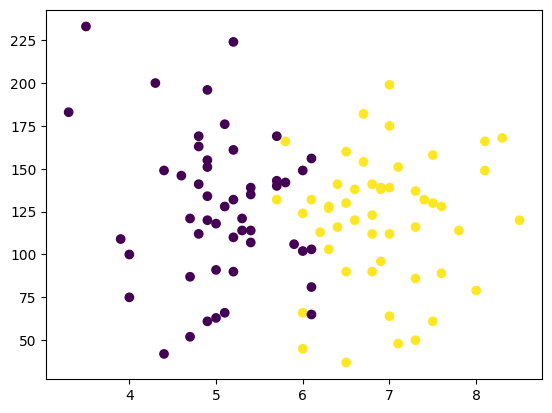

In [18]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

#### Feature Selection

#### Extract input and output columns

In [19]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [20]:
X

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [21]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [22]:
y.shape

(100,)

#### Split the values  -- pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [24]:
X_train

,Unnamed: 0,cgpa
90,90,7.3
43,43,6.8
74,74,6.7
86,86,5.1
59,59,4.8
...,...,...
10,10,6.0
98,98,6.3
78,78,6.1
36,36,5.7


In [25]:
y_train

90    1
43    1
74    1
86    0
59    0
     ..
10    1
98    1
78    0
36    0
60    1
Name: placement, Length: 90, dtype: int64

In [26]:
X_test

,Unnamed: 0,cgpa
20,20,6.6
94,94,4.7
15,15,5.1
83,83,7.5
0,0,6.8
56,56,6.1
39,39,4.6
2,2,5.3
40,40,4.9
84,84,5.7


#### Scale the values

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()

In [29]:
X_train = scaler.fit_transform(X_train)


In [30]:
X_train

array([[ 1.40773293,  1.10877126],
       [-0.25420129,  0.67565749],
       [ 0.84196809,  0.58903473],
       [ 1.26629172, -0.79692934],
       [ 0.31156355, -1.05679761],
       [ 0.59444597, -0.8835521 ],
       [ 1.72597565,  0.15592096],
       [ 1.12485051,  0.41578922],
       [-1.63325308, -0.19057006],
       [ 0.38228416,  1.10877126],
       [-1.17356915, -2.35613893],
       [ 0.13476204,  0.32916647],
       [-0.32492189, -0.53706108],
       [ 0.45300476,  0.24254371],
       [-0.67852491, -1.8364024 ],
       [ 0.70052688,  0.24254371],
       [-0.78460582, -0.71030659],
       [-0.4310028 ,  0.41578922],
       [-1.27965005,  0.0692982 ],
       [ 0.09940174,  1.97499881],
       [ 0.48836507,  0.848903  ],
       [ 1.44309323,  1.28201677],
       [-0.57244401, -1.05679761],
       [-1.31501036,  0.32916647],
       [-1.59789278,  0.93552575],
       [ 1.08949021, -0.53706108],
       [ 1.51381384,  0.67565749],
       [ 0.27620325,  1.71513054],
       [-0.28956159,

In [31]:
X_test = scaler.transform(X_test)


In [32]:
X_test


array([[-1.06748824,  0.50241198],
       [ 1.54917414, -1.14342036],
       [-1.24428975, -0.79692934],
       [ 1.16021081,  1.28201677],
       [-1.77469429,  0.67565749],
       [ 0.20548265,  0.0692982 ],
       [-0.39564249, -1.23004312],
       [-1.70397368, -0.62368383],
       [-0.36028219, -0.97017485],
       [ 1.19557111, -0.27719282]])

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
clf = LogisticRegression()

In [35]:

# model training
clf.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred = clf.predict(X_test)


In [37]:
y_test


20    1
94    0
15    0
83    1
0     1
56    0
39    0
2     0
40    0
84    0
Name: placement, dtype: int64

In [38]:
from sklearn.metrics import accuracy_score


In [39]:
accuracy_score(y_test,y_pred)


0.8

TO Visualize

<Axes: >

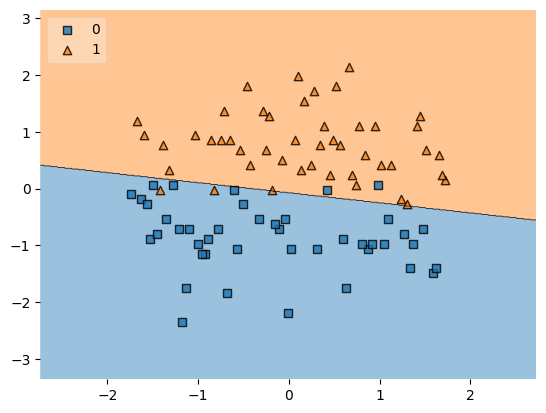

In [40]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


#### TO Deploy

In [41]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))